# Introducción<a id='int'></a>

La tienda online **Ice** vende videojuegos por todo el mundo. Esta tienda necesita identificar patrones que determinen si un juego tiene éxito o no. Esto le permitirá detectar proyectos prometedores y planificar campañas publicitarias. Es diciembre de 2016 y se está planeando una campaña para el 2017.

## Contentido<a id='con'></a>

1. [Introducción](#int)
    - [Contentido](#con)
2. [Iniciación de datos](#ini)
3. [Preparación de datos](#pre)
    - [Renombramos columnas](#ren)
    - [Información sobre valores categóricos](#inf)
    - [Tratamiento de valores ausentes](#tra)
    - [Tipos de datos](#tip)
4. [Análisis de datos](#ana)
    - [Juegos lanzados por año](#jue)
    - [Ventas por plataforma de juego](#ven)
    - [Período de tiempo](#per)
    - [Plataformas son líderes en ventas](#pla)
    - [Reseñas en la ventas de X360](#res)
    - [Ventas en otras plataformas](#ven)
    - [Ventas por género de juego](#vent)
5. [Perfil de usuario para cada región](#per)
    - [Las 5 plataformas en NA, EU y JP](#las)
    - [Los 5 géneros en NA, EU y JP](#los)
    - [Clasificaciones de ESRB afectan a las ventas en regiones individuales](#cla)
6. [Prueba de hipótesis](#hip)
    - [Prueba de hipótesis 1](#pr1)
    - [Prueba de hipótesis 2](#pr2)
7. [Conclusión general](#con)

# Iniciación de datos<a id='ini'></a>

Librerías y carga de datos

In [3]:
# librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact  # para gráficos interactivos

In [4]:
# carga de datos
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

**Descripción de datos**

* Name: Nombre del juego.
* Platform: Plataforma de juego, Wii, NES, PS3, etc.
* Year_of_Release: Año de lanzamiento.
* Genre: Género de juego, sports, action, role-playin, etc.
* NA_sales: Ventas en Norteamérica en millones de dólares estadounidenses.
* EU_sales: Ventas en Europa en millones de dólares estadounidenses.
* JP_sales: Ventas en Japón en millones de dólares estadounidenses.
* Other_sales: Ventas en otros países en millones de dólares estadounidenses.
* Critic_Score: Máximo de 100.
* User_Score: Máximo de 10.
* Ratting: Clasificación ESRB (Entertainment Software Rating Board) acerca del contenido de los videojuegos
    - E: todos
    - E10+: todos a partir de 10 años
    - T: adolescentes
    - M: maduro a partir de 17 años
    - AO: solo adultos de más de 18 años
    - RP: aún sin clasificar, probablemente madura +17
    - EC: niños pequeños hasta 5 años (clasificación descontinuada)
    - K-A: para niños y adultos, en el 1998 pasó a llamarse E.


In [5]:
display(data.head(10))
print('hay', data.duplicated().sum(), 'registros duplicados', )
print()
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


hay 0 registros duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Inicializando los datos podemos ver un dataset de 16715 registros y 11 columnas, no existen registros completos duplicados. Vemos nombres de columnas por renombrar, por tipos de datos por actualizar y valores ausentes por investigar e imputar de ser necesario.

# Preparación de datos<a id='pre'></a>

Para preparar los datos, realizaremos las siguientes acciones:
* Renombraremos con minúsculas todos los nombres de columnas. 
* Mostraremos valores únicos por cada columna, para tener un panorama de los valores como herramienta de consulta.
* Observamos que necesitaremos tratar valores ausentes en las columnas `name`, `year_of_release`, `genre`, `critic_score`, `user_score` y `rating`. Además revisar en `user_score` el valor tbd 'to be determined'(2424 valores) que significa, y como manejaremos estos datos.
* Después de los imputamientos de NaN, cambiaremos el tipo de datos en columnas que requiera de un cambio.

## Renombramos columnas<a id='ren'></a>

In [6]:
# Convertir en minúsculas todos los nombres de columnas
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Listo, el nombre de las columnas en minúsculas.

## Información sobre valores categóricos<a id='inf'></a>

Con el fin de conocer los valores de nuestras columnas dejamos el siguiente resumen:

In [7]:
# Revisemos valores únicos en varias columnas
for column in ['name','platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']:
    print('column', column, ', unique values ', len(data[column].unique()))
    print(data[column].sort_values().unique())
    print()

column name , unique values  11560
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]

column platform , unique values  31
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']

column year_of_release , unique values  38
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]

column genre , unique values  13
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]

column critic_score , unique values  83
[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 

## Tratamiento de valores ausentes<a id='tra'></a>
Analizaremos los datos ausentes en cada columna y realizaremos un tratamiento adecuado.

In [8]:
# Revisemos total de valores ausentes por columnas
print('Missing values by column:')
data.isna().sum()

Missing values by column:


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# Buscamos NaN en las columna name y genre a la vez
display(data.query('name.isna() and genre.isna()'))

# Buscamos NaN en las 4 columnas year_of_release, critic_score, user_score y rating a la vez
display(data.query('year_of_release.isna() and critic_score.isna() and user_score.isna() and rating.isna() '))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Hemos encontramos 2 registros con valores ausentes en 5 columnas a la vez, y 85 registros con valores ausentes en 4 columnas a la vez, es claro que falta información importante en estos registros; por esta razón y ya que solo representa mínimamente el 0.5% de los datos, decidimos que eliminaremos estos 87 registros, a continuación:

In [10]:
# Guardamos los indices a borrar
index_to_drop_1 = data.query('name.isna() and genre.isna()').index
index_to_drop_2 = data.query(
    'critic_score.isna() and user_score.isna() and rating.isna() and year_of_release.isna()').index

In [11]:
# Eliminamos los registros guardados en los indices indices
data.drop(index_to_drop_1, axis=0, inplace=True)
data.drop(index_to_drop_2, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
# Comprobar que se eliminaron las 2 filas con NaN
print(len(data.query('name.isna() and genre.isna()')))

# Comprobar que se eliminaron las 85 filas con NaN
print(len(data.query('critic_score.isna() and user_score.isna() and rating.isna() and year_of_release.isna()')))

0
0


In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release     184
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8491
user_score         6614
rating             6679
dtype: int64

In [14]:
len(data)

16628

Total de registros 16628 después de depurar los 87 registros, ahora vamos a realizar tratamiento al resto de NaN. 

**En la columna `year_of_release`** tenemos 184 registros con NaN.


Ahora guardamos los nombres y plataformas de los 184 registros que no tienen año en la variable year_nan.

In [15]:
# Guardamos los registros donde year_of_release es igual a NaN para posteriores comprobaciones
year_nan = data.query('year_of_release.isna()')

In [16]:
# Mostramos los juegos totales por año para luego comparar 
data.year_of_release.value_counts(dropna=False).head(25)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
NaN        184
1994.0     121
1993.0      60
Name: year_of_release, dtype: int64

In [17]:
# Función 'fill_na' para rellenar NaN en varias columnas con el valor más repetido en un agrupamiento

def fill_na(x):
    # st.mode devuelve un array con [moda, count], seleccionamos la moda [0]
    x_nonan = x.dropna()
    if not set(x_nonan):
        return x
    value = st.mode(x_nonan)[0][0]  
    return x.fillna(value)
     

In [18]:
# prueba
#data.groupby('name')['year_of_release'].transform(fill_na).value_counts(dropna=False)

In [19]:
# Rellenamos los NaN de acuerdo a la columna name, buscando el año del nombre del juego que más se repite usamos fill_na
data['year_of_release'] = data.groupby('name')['year_of_release'].transform(fill_na)

C:\Users\angel\AppData\Local\Temp\ipykernel_6200\2171016198.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  value = st.mode(x_nonan)[0][0]


In [20]:
data.year_of_release.value_counts(dropna=False).head(25)

2008.0    1438
2009.0    1429
2010.0    1267
2007.0    1202
2011.0    1146
2006.0    1018
2005.0     948
2002.0     844
2003.0     783
2004.0     763
2012.0     662
2015.0     606
2014.0     581
2013.0     547
2016.0     502
2001.0     486
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
NaN         82
1993.0      60
Name: year_of_release, dtype: int64

In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release      82
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8491
user_score         6614
rating             6679
dtype: int64

Como observamos los NaN en la columna `year_of_release` han disminuido de 184 a 82 NaN.

**NaN de la columna `rating`**

A continuación trataremos los NaN en la columna rating, en esta columna tenemos 6679 NaN. El rating nos indica la clasificación determinada para el juego. Vamos a realizar el imputamiento de acuerdo al nombre del juego. Para esto disminuiremos el total de juegos, y crearemos una columna llamada short_name que recortará el nombre cuando encuentre el simbolo dos puntos ":".

In [22]:
data.sort_values(by='name').tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12594,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
4647,pro evolution soccer 2011,PS2,2010.0,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E
16424,th!nk Logic Trainer,Wii,2009.0,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,NaN
10797,thinkSMART,DS,2010.0,Misc,0.09,0.00,0.00,0.01,NaN,tbd,E
14386,thinkSMART FAMILY!,Wii,2010.0,Misc,0.03,0.00,0.00,0.00,NaN,tbd,E
16407,thinkSMART: Chess for Kids,DS,2011.0,Misc,0.01,0.00,0.00,0.00,NaN,tbd,E
643,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
15535,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E
8246,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
9097,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN


In [23]:
# Insertar nueva columna 'short_name' en la 2da posicion
data.insert(1, 'short_name', data['name'].str.split(':').str.get(0) )

In [24]:
data

,name,short_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16623,Samurai Warriors: Sanada Maru,Samurai Warriors,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16624,LMA Manager 2007,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16625,Haitaka no Psychedelica,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16626,Spirits & Spells,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
print('en name ', len(data.name.unique()), ', en short_name', len(data.short_name.unique()))

en name  11495 , en short_name 9282


In [26]:
data.name.sort_values().tail()

16407      thinkSMART: Chess for Kids
643                      uDraw Studio
15535    uDraw Studio: Instant Artist
8246     uDraw Studio: Instant Artist
9097     ¡Shin Chan Flipa en colores!
Name: name, dtype: object

In [27]:
data.short_name.sort_values().tail()

14386              thinkSMART FAMILY!
8246                     uDraw Studio
643                      uDraw Studio
15535                    uDraw Studio
9097     ¡Shin Chan Flipa en colores!
Name: short_name, dtype: object

Creamos la columna short_name, con el fin de tener menos nombres de juegos. En la columna name tenemos 11495 nombres diferentes, y en la nueva columna short_name tenemos 9282, mucho menos. 

A continuación vamos a usar short_name para rellenar NaN en rating condicionada al rating del short_name que corresponda.

In [28]:
# Guardamos los registros donde rating es igual a NaN por si tenemos que comprobar más adelante los reemplazos
rating_nan = data.query('rating.isna()')

In [29]:
data.rating.value_counts(dropna=False)

NaN     6679
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [30]:
# Rellenamos los NaN buscando llamamos a nuestra función fill_na
data['rating'] = data.groupby('short_name')['rating'].transform(fill_na)

C:\Users\angel\AppData\Local\Temp\ipykernel_6200\2171016198.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  value = st.mode(x_nonan)[0][0]
C:\Users\angel\AppData\Local\Temp\ipykernel_6200\2171016198.py:8: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  value = st.mode(x_nonan)[0][0]


In [31]:
data.rating.value_counts(dropna=False)

NaN     5558
E       4323
T       3402
M       1750
E10+    1571
EC        16
K-A        4
RP         3
AO         1
Name: rating, dtype: int64

In [32]:
data.isna().sum()

name                  0
short_name            0
platform              0
year_of_release      82
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8491
user_score         6614
rating             5558
dtype: int64

Los NaN de la columna rating han disminuido de 6679 a 5558, es decir 1121 valores ausentes 
fueron imputados de acuerdo al nombre del juego.

Aún hay 5558 rating con NaN por lo que hemos decidido realizar un nuevo imputamiento a aquellos rating vacíos de acuerdo al rating de otros juegos básandose en el género y a la plataforma.

In [33]:
# Conteo de valores rating antes del imputamiento
data['rating'].value_counts(dropna=False)

NaN     5558
E       4323
T       3402
M       1750
E10+    1571
EC        16
K-A        4
RP         3
AO         1
Name: rating, dtype: int64

In [34]:
# Prueba
#data.groupby(['genre'])['rating'].transform(fill_na).value_counts(dropna=False)

In [35]:
# Rellenando NaN en rating
data['rating'] = data.groupby(['genre'])['rating'].transform(fill_na)

C:\Users\angel\AppData\Local\Temp\ipykernel_6200\2171016198.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  value = st.mode(x_nonan)[0][0]
C:\Users\angel\AppData\Local\Temp\ipykernel_6200\2171016198.py:8: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  value = st.mode(x_nonan)[0][0]


In [36]:
# Conteo de valores rating después del imputamiento
data['rating'].value_counts(dropna=False)

E       7615
T       5449
M       1969
E10+    1571
EC        16
K-A        4
RP         3
AO         1
Name: rating, dtype: int64

In [37]:
# Actualizamos vista de totales NaN por columnas
data.isna().sum()

name                  0
short_name            0
platform              0
year_of_release      82
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8491
user_score         6614
rating                0
dtype: int64

Hasta ahora se ha rellenado todos los NaN de la columna rating, de acuerdo al nombre del juego y posteriormente de acuerdo al género del juego.

**NaN de las columnas `critic_score` y `user_score`**

Estas columnas se refieren a puntajes de juego. Se ha revisado si las ventas están relacionadas con el puntaje, pero no es así. Por lo que no existen un patrón que nos diga que el camino es imputar estos NaN de acuerdo a sus ventas.

In [38]:
data.critic_score.value_counts(dropna=False)

NaN     8491
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
21.0       1
17.0       1
22.0       1
13.0       1
Name: critic_score, Length: 83, dtype: int64

In [39]:
data.user_score.value_counts(dropna=False)

NaN    6614
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

En la columna `user_score` cambiaremos los valores tbd / 2424 por NaN. Puesto que el tbd significa "to be determined" a determinar sigue siendo desconocido al igual que NaN se decide cambiarlos como NaN y así tratar su imputamiento en conjunto.

In [40]:
# Cambiamos tbd a NaN
data.user_score = data.user_score.replace("tbd", np.nan)

In [41]:
# Cambiamos a float la columna user_name
data.user_score = data.user_score.astype(float)

In [42]:
data.isna().sum()

name                  0
short_name            0
platform              0
year_of_release      82
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8491
user_score         9038
rating                0
dtype: int64

Hasta ahora tenemos 9038 NaN en user_score, y 8491 NaN critic_score . 

Vamos a imputar parte de estos NaN así:

 * Para los NaN de user_score, asignar el valor de critic_score / 10.
 * Para los NaN de critic_score, asignar el valor de user_score * 10.

In [43]:
# Revisemos cuando user_score es NaN y critic_score tiene valor
data.query('not critic_score.isna() and user_score.isna()')

,name,short_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.2,0.28,85.0,NaN,T
301,Namco Museum: 50th Anniversary,Namco Museum,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+
440,Need for Speed III: Hot Pursuit,Need for Speed III,PS,1998.0,Racing,2.14,0.86,0.0,0.13,88.0,NaN,E
635,Riven: The Sequel to Myst,Riven,PC,1997.0,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E
643,uDraw Studio,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16490,Space Raiders,Space Raiders,GC,2003.0,Shooter,0.01,0.00,0.0,0.00,40.0,NaN,T
16582,Super Robot Taisen: Original Generation,Super Robot Taisen,GBA,2002.0,Role-Playing,0.01,0.00,0.0,0.00,72.0,NaN,T
16608,Planet Monsters,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,NaN,E
16610,Bust-A-Move 3000,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,NaN,E


Tenemos 1120 registros donde critic_score tiene valor y user_score es NaN.

In [44]:
# Revision de valores en user_score previa al imputamiento
data['user_score'].value_counts(dropna=False)

NaN    9038
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0.0       1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [45]:
# Prueba antes del fillna
#data.query('not critic_score.isna() and user_score.isna()')['user_score'].fillna(data['critic_score'] /10)

In [46]:
# Rellenamos NaN en "user_score" con el valor de critic_score/10
data['user_score'] = data['user_score'].fillna(data['critic_score']/10)

In [47]:
# Comprobamos después del cambio
data['user_score'].value_counts(dropna=False)

NaN    7918
7.8     343
8.0     296
8.2     287
7.5     273
       ... 
1.1       2
1.9       2
9.6       2
0.0       1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [48]:
data.isna().sum()

name                  0
short_name            0
platform              0
year_of_release      82
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8491
user_score         7918
rating                0
dtype: int64

In [49]:
# Revisemos cuando critic_score es NaN y user_score tiene valor
data.query('not user_score.isna() and critic_score.isna()')

,name,short_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
255,Call of Duty: Advanced Warfare,Call of Duty,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,Call of Duty,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
359,Just Dance 2014,Just Dance 2014,Wii,2013.0,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+
...,...,...,...,...,...,...,...,...,...,...,...,...
16549,Deal or No Deal,Deal or No Deal,PC,2006.0,Misc,0.00,0.01,0.00,0.00,NaN,7.5,E
16556,Rugby Challenge 3,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E
16567,Ben 10 Omniverse 2,Ben 10 Omniverse 2,X360,2013.0,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+
16574,Bookworm Deluxe,Bookworm Deluxe,PC,2006.0,Puzzle,0.01,0.00,0.00,0.00,NaN,8.0,E


Tenemos 573 registros donde critic_score es NaN y user_score tiene valor. A estos registros realizaremos el imputamiento a continuación.

In [50]:
# Revision de valores en critic_score previa al imputamiento
data['critic_score'].value_counts(dropna=False)

NaN     8491
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
21.0       1
17.0       1
22.0       1
13.0       1
Name: critic_score, Length: 83, dtype: int64

In [51]:
# Prueba antes del fillna
#data.query('not user_score.isna() and critic_score.isna()')['critic_score'].fillna(data['user_score']*10)

In [52]:
# Rellenamos NaN en critic_score con el valor de user_score * 10
data['critic_score'] = data['critic_score'].fillna(data['user_score'] * 10)

In [53]:
# Comprobamos después del cambio
data['critic_score'].value_counts(dropna=False)

NaN     7918
70.0     280
71.0     268
78.0     266
80.0     260
        ... 
9.0        1
7.0        1
21.0       1
0.0        1
6.0        1
Name: critic_score, Length: 94, dtype: int64

In [54]:
data.query('not user_score.isna() and critic_score.isna()')

,name,short_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [55]:
data.isna().sum()

name                  0
short_name            0
platform              0
year_of_release      82
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7918
user_score         7918
rating                0
dtype: int64

In [56]:
print(f'critic_score {data.critic_score.isna().sum()/len(data):.1%}')
print(f'user_score {data.user_score.isna().sum()/len(data):.1%}')

critic_score 47.6%
user_score 47.6%


Se realizó el imputamiento parcial para critic_score y user_score, pero aún tenemos muchos NaN, un 48% en cada columna para ser más específicos. 

Podríamos pensar que los puntajes están relacionados al éxito o fracaso en ventas. Por lo que vamos a revisar la correlación entre el total de ventas para critic_score y user_score, de acuerdo a estos resultados podremos tomar una decisión de imputar estos valores ausentes.

Primero, vamos a crear la columna `total_sales`, a la que le otorgaremos la suma de todas las ventas ventas, es decir de las 4 columnas: na_sales, eu_sales, jp_sales y other_sales.

In [57]:
# Creamos una columna con el total de ventas de EEUU, Europa, Japón y otros paises y la colocamos en la 10ma posición
data.insert(11, 'total_sales', data[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum(axis=1))

Correlation total_sales and user_score 0.11


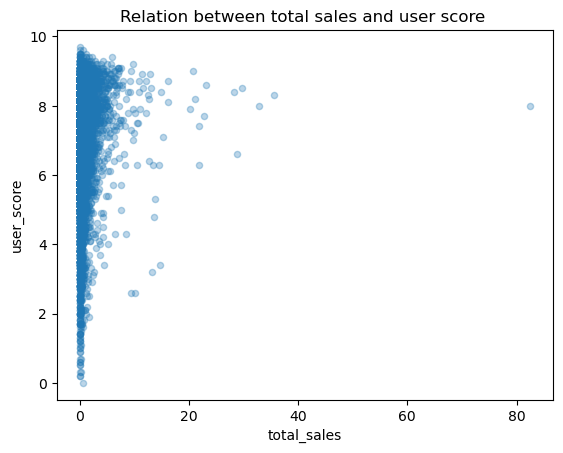

In [58]:
print('Correlation total_sales and user_score', data.total_sales.corr(data.user_score).round(2))
data.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, 
          title='Relation between total sales and user score ')
plt.show()

Hemos revisado la correlación entre el total de ventas y puntaje, y obtenemos que exiten una débil relación lineal entre el total_sales y user_score. Es decir, la conexión entre estas variables seguramente es más complejo que solo decir que a mayores ventas obtendremos un mayor puntaje, o a menores ventas menores puntajes. Por lo que se decide dejar los NaN sin imputar.

Correlation total_sales and critic_score 0.23


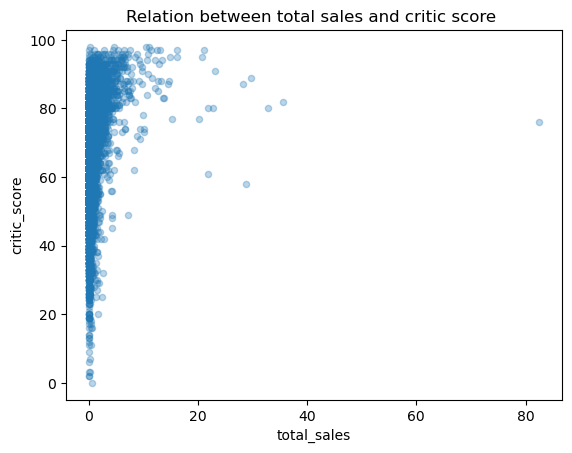

In [59]:
print('Correlation total_sales and critic_score', data.total_sales.corr(data.critic_score).round(2))
data.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, 
          title='Relation between total sales and critic score ')
plt.show()

Hemos revisado la correlación entre el total de ventas y puntaje, y obtenemos que exiten una débil relación lineal entre el total_sales y critic_score. Es decir, la conexión entre estas variables seguramente es más complejo que solo decir que a mayores ventas obtendremos un mayor puntaje, o a menores ventas menores puntajes. Por lo que se decide también dejar los NaN sin imputar.

In [60]:
data.isna().sum()

name                  0
short_name            0
platform              0
year_of_release      82
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7918
user_score         7918
total_sales           0
rating                0
dtype: int64

## Tipos de datos<a id='tip'></a>

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16628 entries, 0 to 16627
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16628 non-null  object 
 1   short_name       16628 non-null  object 
 2   platform         16628 non-null  object 
 3   year_of_release  16546 non-null  float64
 4   genre            16628 non-null  object 
 5   na_sales         16628 non-null  float64
 6   eu_sales         16628 non-null  float64
 7   jp_sales         16628 non-null  float64
 8   other_sales      16628 non-null  float64
 9   critic_score     8710 non-null   float64
 10  user_score       8710 non-null   float64
 11  total_sales      16628 non-null  float64
 12  rating           16628 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.6+ MB


La columna year_of_release que guarda el año, se encuentra como tipo 'float'; esta columna se dejará tal cual ya que existen valores NaN que no pudimos imputar.

# Análisis de datos<a id='ana'></a>

## Juegos lanzados por año<a id='jue'></a>

Mira cuántos juegos fueron lanzados en diferentes años.

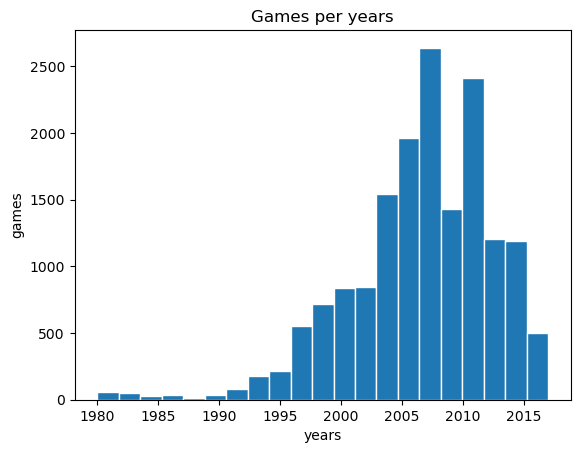

In [62]:
plt.hist(data.year_of_release, range=(1980, 2017), bins=21, ec='white')
plt.title('Games per years')
plt.xlabel('years')
plt.ylabel('games')
plt.show()

El histograma muestra el número de juegos por años (1980-2015). Rápidamente podemos observar que el 2007 fue el año con más juegos lanzados y que los 10 primeros años se ven como atípicos, es decir los primeros años existen muy pocos lanzamientos.

**¿Son significativos los datos de cada período?**

Para dar respuesta vamos a determinar los años atípicos y los años significativos para nuestro análisis.

In [63]:
# Función bounds para calcular los límites superior e inferior de una columna.

def bounds(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = (Q1 - 1.5 * IQR).astype('int')
    lim_max = (Q3 + 1.5 * IQR).astype('int')
    
    return [lim_min, lim_max]

    # Retornamos una lista con 2 valores [limite inferior, limite superior]

In [64]:
# Obtener el periodo válido de años.
min, max = bounds(data, 'year_of_release')
#valid   = data.query('year_of_release > @min and year_of_release < @max')['year_of_release'].sort_values().unique()
print(f'Valid period since {min}')

Valid period since 1992


Hemos descubierto que entre 1980 y 1992 es un periodo atípicos en los datos, es decir los registros significativos para este análisis serán a partir del año 1993. 
Vamos a actualizar nuestro dataset tomando en cuenta los datos de 1992 en adelante.

In [65]:
# Filtrado de datos
data = data.query('year_of_release > @min')
len(data)

16241

Hemos depurado nuestros datos dejando solo información de los juegos a partir de 1993. El total de registros disminuyó a 16241, menos del 0.02% de registros fueron retirados.

## Ventas por plataforma de juego<a id='ven'></a>

Revisemos como están distribuidas las ventas por plataforma. 

In [66]:
sales = data.groupby('platform').total_sales.sum().sort_values(ascending=False)
sales

platform
PS2     1247.14
X360     966.41
PS3      935.00
Wii      902.33
DS       804.20
PS       727.58
PS4      314.14
GBA      313.73
PSP      292.53
3DS      258.21
XB       256.66
PC       255.76
N64      218.01
GC       198.66
XOne     159.32
GB       152.08
SNES     124.69
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.78
NES        3.72
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

Vemos que las ventas totals por plataformas de mayor a menor. PS2 tiene el mayor número de ventas.

In [67]:
# Guardamos en platforms las 10 plataformas con mayores ventas (de mayor a menor)

platforms = sales.head(10).index.tolist()
print('Main platforms')
print(platforms)

Main platforms
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


Tenemos nuestras plataformas más vendidas (de mayor a menor), PS2 encabeza este top. Para ver más a detalle revisemos como las ventas de estas plataformas están distribuidas por año.

In [68]:
# Resumen de ventas anuales por plataforma
sales_platform = data.pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum')

# Dejamos solo las columnas con las 10 plataformas principales 
sales_platform = sales_platform[platforms]

In [69]:
# sales_platform

In [70]:
# Graficamos resumen de ventas anuales por plataforma

@interact(platform=['ALL'] + platforms)
def _(platform):
    if platform == 'ALL':
        sales_platform.plot(figsize=(10, 6), grid=True, ylabel='sales Millions USD', 
                                 title='Sales per platform and years')
    else:
        sales_platform.plot(y=platform, figsize=(10, 6), grid=True, ylabel='sales Millions USD',
                                 title='Sales per platform and years')
plt.show()

interactive(children=(Dropdown(description='platform', options=('ALL', 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'…

Lectura del gráfico:

* `PS2` empezó a vender en el 2000 y fue más popular entre el 2002 y el 2005 sus ventas lo reflejaban, a partir de ahí decreció su popularidad y en el 2012 dejó de vender.

* `X360`, empezó a vender en el 2005 y entre el 2007 y el 2012 fue muy popular, de ahí en adelante sus ventas fueron cayendo, en el 2016 sus ventas eran muy bajas.

* `PS3`, empezó a vender desde el 2005 siendo muy popular en ventas en el 2011, a partir de ahí decreció su popularidad y en el 2016 sus ventas eran poco notables.

* `Wii`, empezó a vender con alta popularidad desde el 2006 llegando a sus valores máximos en venta en el 2009, desde ese año en adelante sus ventas fueron decrecieron en el 2016 sus ventas eran casi invisibles.

* `DS`, empezó a vender en el 2004 haciéndose popular rápidamente, sus mejores años de ventas fue entre el 2007 y 2009, de ahí fue decreciendo y en el 2014 ya no tenía ventas.

* `PS`, empezó a vender en el 1994 desapareciendo en el 2004. Sus año de máxima popularidad fue en 1998.

* `PS4`, empezó a vender en el 2013 siendo todavía popular en ventas hasta el 2016. En el 2015 fue el mejor año en ventas, en el 2016 seguía siendo muy popular.

* `GBA`, empezó a vender en el 2000 y desapareció en el 2008. Sus años con más ventas fueron el 2002 y el 2004.

* `PSP`, empezó a vender en el 2004, siendo el 2006 el mejor año en sus ventas, de ahí para delante decreció su popularidad y en el 2016 ya no tuvo ventas.

* `3DS`, empezó a vender en el 2011 este fue su mejor año en ventas, posteriormente fue perdiendo popularidad, en el 2016 registra bajas ventas.

En resumen podemos indicar lo siguiente:

* Las plataformas que solían ser populares y que dejaron de venderse antes del 2017 fueron el PS2, DS, PS, GBA y PSP. Por otro lado 3DS, X360, PS3 y WII en el 2016 registran bajas ventas.

* Revisando los años de lanzamiento de los juegos en base a su tipo de plataforma vimos que es variado el tiempo que tardan las plataformas en aparecer. Tomando en cuenta la gráfica se hicieron apariciones en el 1994, 2000, 2004, 2005, 2006, 2011 y 2013, es decir en promedio cada 3 años se tardan en aparecer nuevas plataformas. 

* Podemos notar que las plataformas generalmente duran 10 años hasta que desaparecen.

## Período de tiempo<a id='per'></a>

Debido a que en promedio el tiempo de vida de las plataformas es de 10 años, vamos a tomar los últimos 10 años para construir nuestro modelo para el 2017 (2007 hasta el 2016).

In [71]:
# Depuramos data y guardamos en clean_data
clean_data = data.query('year_of_release > 2006')
len(clean_data)

9380

Hemos creado una nueva tabla depurada de acuerdo a lo antes indicado, nuestro dataset ahora contiene 9380 registros de juegos desde el 2007, información que consideramos relevante y usaremos a continuación.

## Plataformas son líderes en ventas<a id='pla'></a>

Primero revisemos las ventas totales por plataformas usando nuestros datos apartir del 2007.

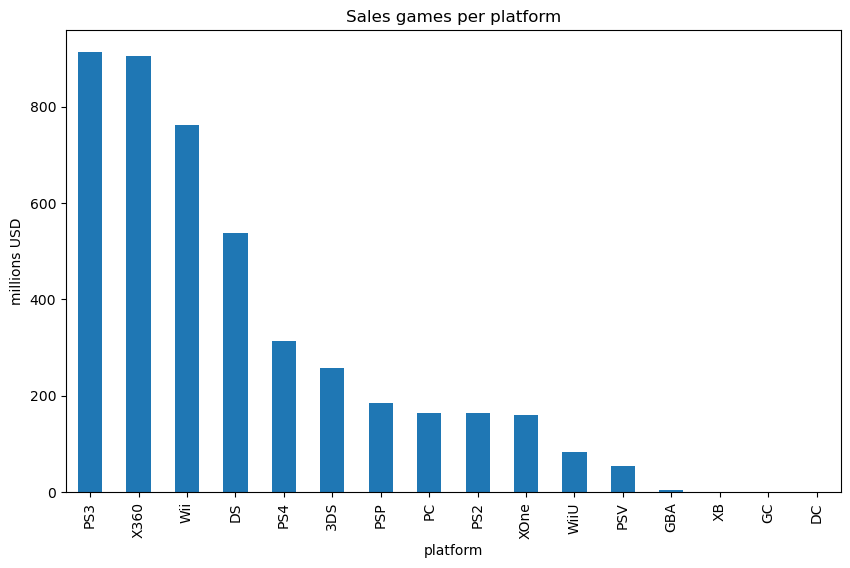

In [72]:
sales_2 = clean_data.groupby('platform').total_sales.sum().sort_values(ascending=False)
sales_2.plot(kind='bar', ylabel='millions USD', figsize=(10,6))
plt.title('Sales games per platform')
plt.show()

Observamos gráficamente las ventas por plataformas, como vemos las platafomras con mayores ventas son PS3, X360 y Wii.

Entonces ¿cuáles plataformas crecen y cuáles decrecen?, para responder esta pregunta revisemos las ventas de plataformas en el tiempo, es decir como varian por año, tomaremos las 10 mejores plataformas para la revisión.

In [73]:
# Resumen de ventas anuales por plataforma
sales_platform_2 = clean_data.pivot_table(index='year_of_release', columns='platform', values='total_sales',aggfunc='sum')

# Depuramos la tabla resumen dejando solo las columnas con las 10 plataformas principales
top_platforms = sales_2.head(10).index.tolist()
sales_platform_2 = sales_platform_2[top_platforms]

In [74]:
# sales_platform_2

In [75]:
# Graficamos

@interact(platform=['ALL'] + top_platforms)
def _(platform):
    if platform == 'ALL':
        sales_platform_2.plot(figsize=(10, 6), grid=True, ylabel='sales Millions USD',
                              title='Sales per top platforms and years')
    else:
        sales_platform_2.plot(y=platform, figsize=(10, 6), grid=True, ylabel='sales Millions USD',
                              title='Sales per top platforms and years')
plt.show()

interactive(children=(Dropdown(description='platform', options=('ALL', 'PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS…

Hallazgos encontrados:

 * Todas las 10 plataformas decrecieron sus ventas antes del 2017. 
 * PS4 y XOne aparecieron en el 2013, en el 2016 aún registran buenas ventas.
 * PS3, X360, Wii y PC registran mínimas ventas en el 2016.
 * PS2 solo decayó a partir del 2006 y desapareció a partir del 2011.
 * 3DS apareció en el 2011 en el 2016 registras ventas por debajo de PS4 y XOne.

Crearemos un diagrama de caja para las ventas globales de todos los juegos, desglosados porplataforma. Revisaremos si son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?.

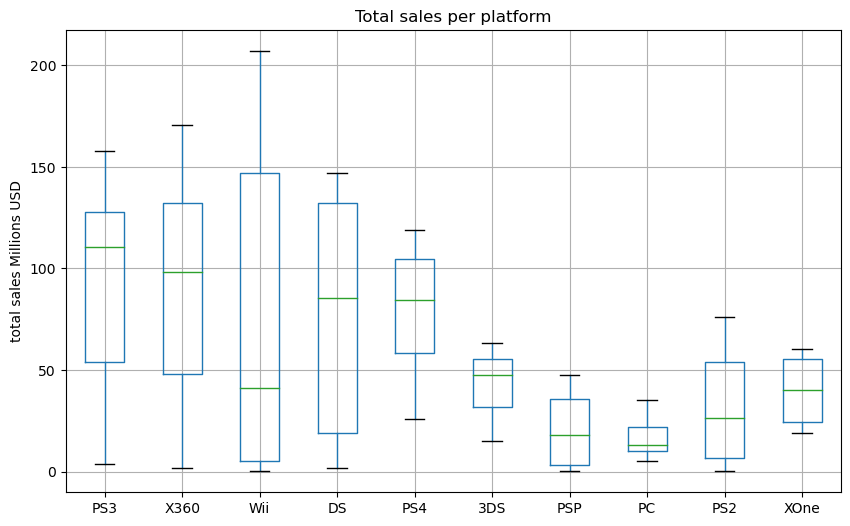

In [76]:
# Gráfico de cajas ventas totales por plataformas
sales_platform_2.boxplot(column=top_platforms, figsize=(10, 6))
plt.ylabel('total sales Millions USD')
plt.title('Total sales per platform')
plt.show()

De acuerdo al diagrama de cajas y bigotes podemos ver rápidamente las principales plataformas a PS3, X360, Wii, DS, PS4

Notamos que PS4 tiene sus ventas menores por sobre las de PS3, X360, DS, y PS4. Por otro lado Wii, sus ventas tienen una fuerte asimetría positiva teniendo ventas muy altas por lo que se podría pensar tiene potencial también.

Podemos indicar entonces que PS4 y Wii podrían ser las más rentables.

## Reseñas en la ventas de X360<a id='res'></a>

Miremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular, por ejemplo X360. Crearemos un gráfico de dispersión y calcularemos la correlación entre las reseñas y las ventas.

In [77]:
# Guardemos en games todos los juegos que tienen plataforma X360 (plataforma popular escogida al azar)
games = clean_data.query('platform == "X360"')

Correlation  0.37


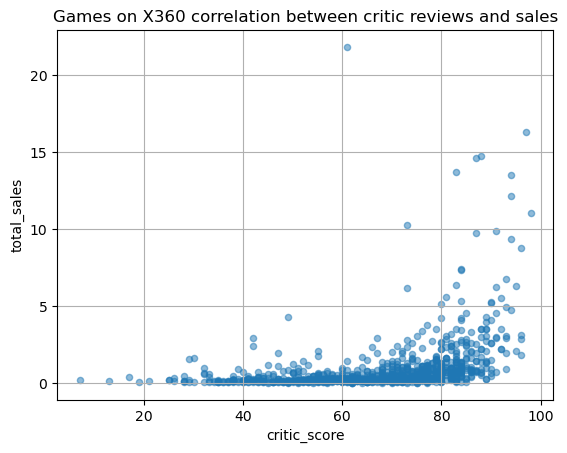

In [78]:
print('Correlation ', games.total_sales.corr(games.critic_score).round(2))

games.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, 
           title='Games on X360 correlation between critic reviews and sales')
plt.show()

Como vemos, la correlación entre el puntaje de los críticos y las ventas de los juegos es de 0.37, esto se considera una débil relación entre ellos, es decir el hecho de que un juego tenga excelente puntaje no garantizará que tengan ventas altas. Como vemos en el gráfico en puntajes altos las ventas varían mucho, pueden tener bajas o altas ventas, pero la mayoría no son tan altas.

Correlation 0.12


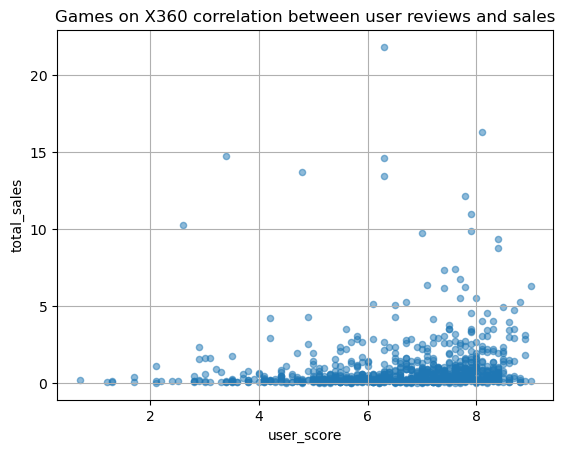

In [79]:
print('Correlation', games.total_sales.corr(games.user_score).round(2))
games.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, 
           title='Games on X360 correlation between user reviews and sales')

plt.show()

La correlación entre el puntaje de los usuarios y las ventas de los juegos es de 0.12, esto se considera una relación poco notoria entre ellos, es decir muy débil, incluso más baja que el anterior, el hecho de que los juegos tengan mayores puntajes no determina que sus ventas sean altas también, como observamos en el gráfico tenemos que en altos puntajes hubieron ventas altas y bajas.

En otras palabras, las reseñas de los críticos y de los usuarios no afectan directamente el éxito o fracaso en sus ventas. 

## Ventas en otras plataformas<a id='ven'></a>

Revisamos que las reseñas no están fuertemente relacionadas con las ventas de los juegos de la plataforma X360. Ahora compararemos las ventas de estos mismos juegos de X360 con las ventas en otras plataformas.

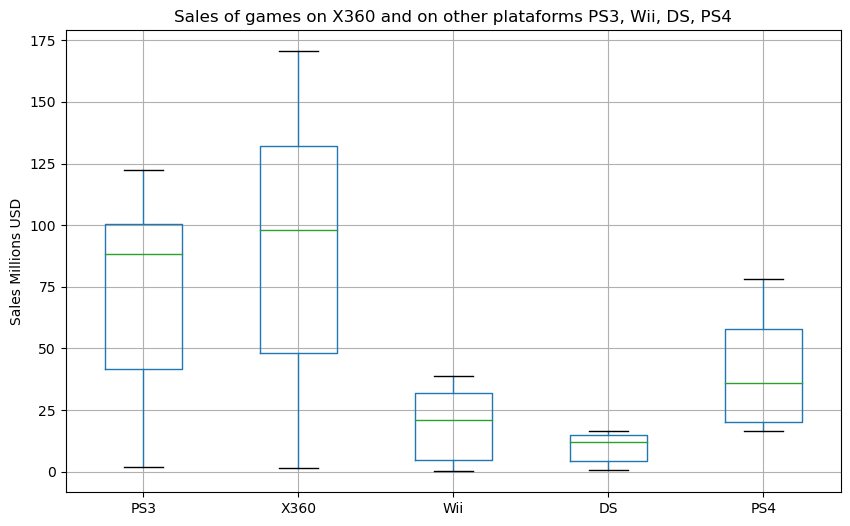

Total games on X360: 1131

Sales
platform
X360    905.40
PS3     701.29
Wii     193.93
PS4     166.90
XOne     89.94
PS2      89.14
PC       86.28
DS       68.07
PSP      49.34
WiiU     18.49
3DS      18.32
PSV      12.03
XB        0.55
GC        0.27
GBA       0.19
dtype: float64


In [80]:
# Usaremos @games.name para obtener el listado nombres de los mismos juegos que tiene la plataforma X360
# y otras plataformas "PS3", "Wii", "DS", "PS4".

games_filter = clean_data.query('name in @games.name').pivot_table(index='year_of_release', 
                                                                   columns='platform', values='total_sales', 
                                                                   aggfunc='sum')

games_filter.boxplot(column= ["PS3", "X360", "Wii", "DS", "PS4"], figsize=(10,6))
plt.ylabel('Sales Millions USD')
plt.title('Sales of games on X360 and on other plataforms PS3, Wii, DS, PS4')
plt.show()

# Información sobre las ventas
print('Total games on X360:', len(clean_data.query('name in @games.name').name.unique()))
print('\nSales')
print(games_filter.sum().sort_values(ascending=False))

Hemos evaluado las ventas de 1131 juegos y notamos claramente que las ventas de los juegos en la plataforma X360 es mucho mayor respecto a la otras plataformas.

## Ventas por género de juego<a id='vent'></a>

* Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [81]:
# Resumen por género
games_genre = clean_data.groupby('genre').agg({'total_sales': ['count','sum']})
games_genre.columns = ['games','sales']
games_genre['sales'] = round(games_genre['sales']).astype('int')
games_genre.sort_values(by='sales',ascending=False, inplace=True)

In [82]:
# games_genre

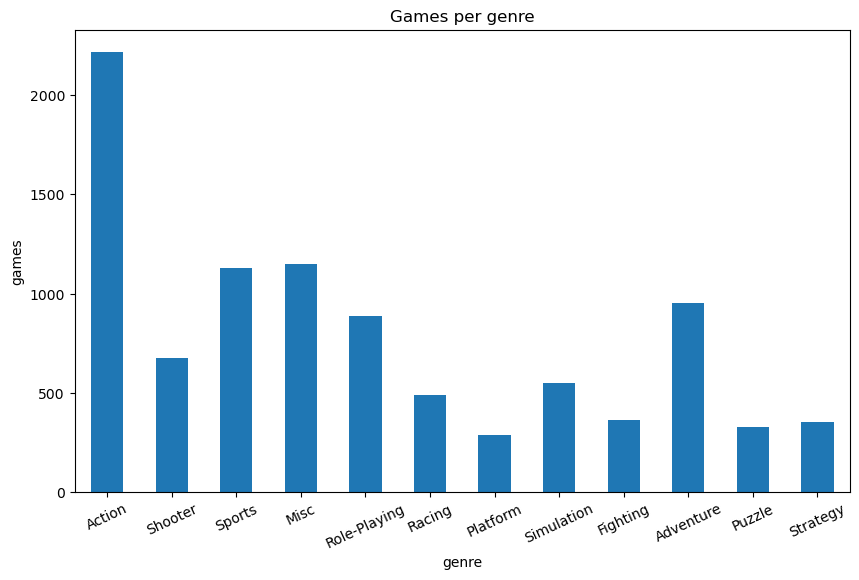

In [83]:
# Graficamos como están distribuidos los juegos por género
games_genre.games.plot(kind='bar', rot=25, figsize=(10,6), ylabel='games')
plt.title('Games per genre')
plt.show()

- El género *Action* tiene el mayor número de juegos sobrepasa los 2000 juegos.
- El género *Platform* tiene el menor número de juegos lanzados.

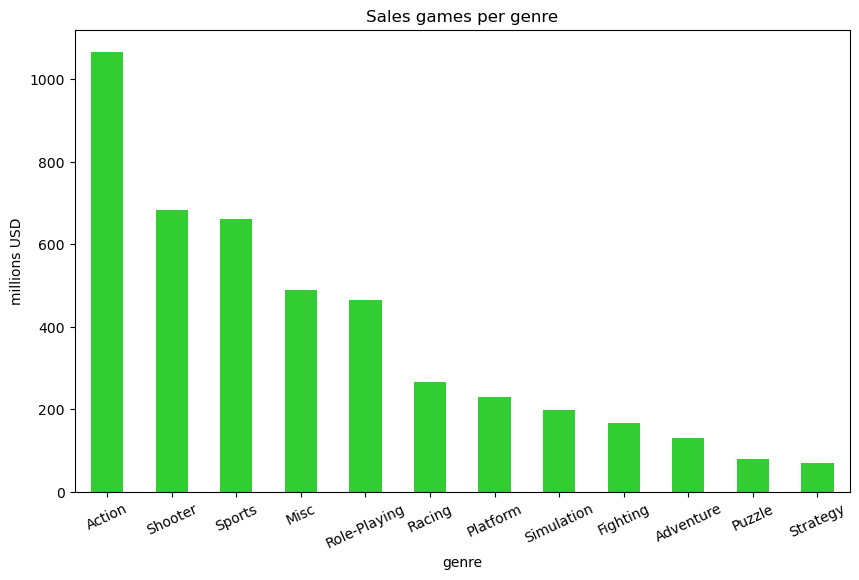

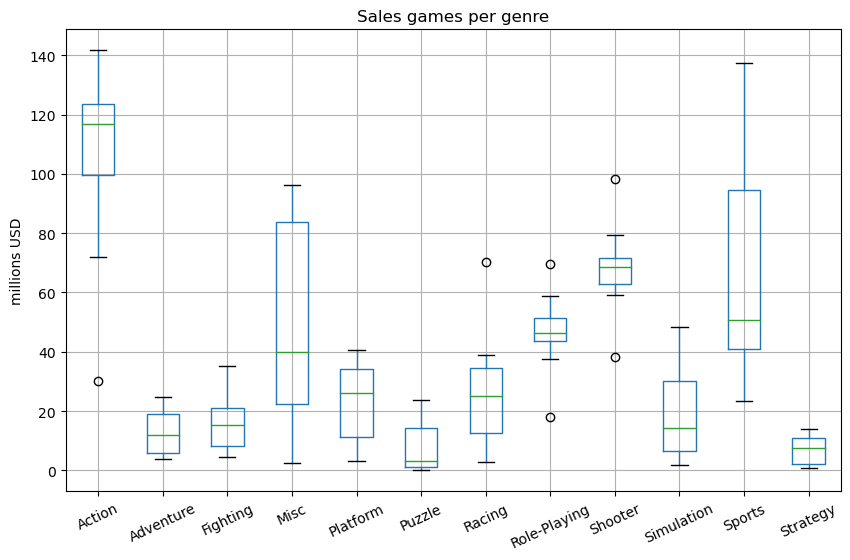

In [84]:
# Gráficos por totales de ventas y género
games_genre.sales.plot(figsize=(10,6), kind='bar', rot=25, color='LimeGreen')
plt.title('Sales games per genre')
plt.ylabel('millions USD')
plt.show()

clean_data.pivot_table(index='year_of_release', columns='genre', 
                       values='total_sales', aggfunc='sum'
                      ).boxplot(figsize=(10, 6), rot=25)
plt.title('Sales games per genre')
plt.ylabel('millions USD')
plt.show()

*Action, Shooter y Sports* son los géneros con mayores ventas, sobresaliendo notablemente *Action*, no esperábamos menos con la inmensa cantidad de juegos que posee.

- *Action* tiene una asimetría negativa, esto quiere decir que el promedio de sus ventas es menor que la mediana de ellas.
- *Shooter* tiene su promedio y mediana muy cercanas lo cual nos menor probabilidad de caer en bajas ventas sin embargo sus ventas más altas no están sobre las de los géneros Áction y Sports.
- *Sports*  se encuentra sesgada a la derecha, esto quiere decir que la venta promedio es mayor que la mediana. Sus datos estas bastante sesgados, sus ventas bajas pueden estar por debajo de Action y Shooter, pero con ventas casi tan altas como Action.


# Perfil de usuario para cada región<a id='per'></a>

Para cada región (NA, UE, JP) determinemos:
* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
* Los cinco géneros principales. Explica la diferencia.
* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

## Las 5 plataformas en NA, EU y JP<a id='las'></a>

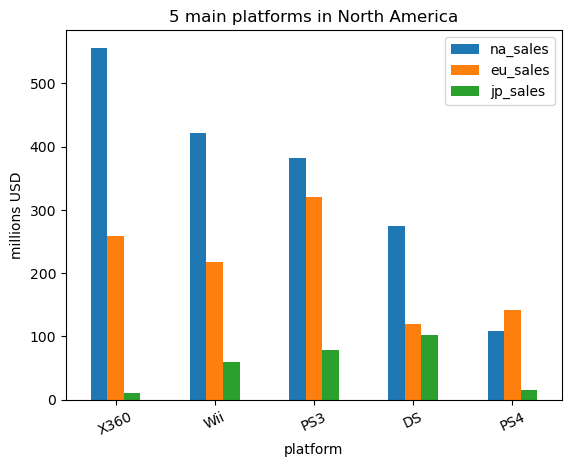

In [85]:
platform_region = clean_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

platform_region.sort_values(by='na_sales',ascending=False).head().plot(kind='bar', ylabel='millions USD', rot=25)
plt.title('5 main platforms in North America')
plt.show()

Las plataformas con mayores ventas en Norte América son X360, Wii, PS3, DS y PS4 (de mayor a menor).

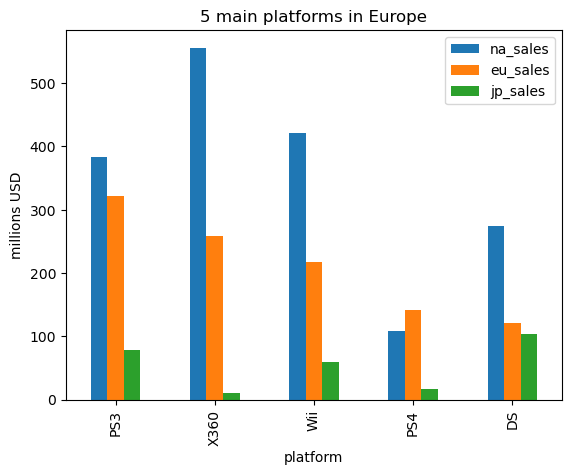

In [86]:
platform_region.sort_values(by='eu_sales',ascending=False).head().plot(kind='bar', ylabel='millions USD')
plt.title('5 main platforms in Europe')
plt.show()

Las plataformas con mayores ventas en Europa son PS3, X360, Wii, PS4 y DS (de mayor a menor).

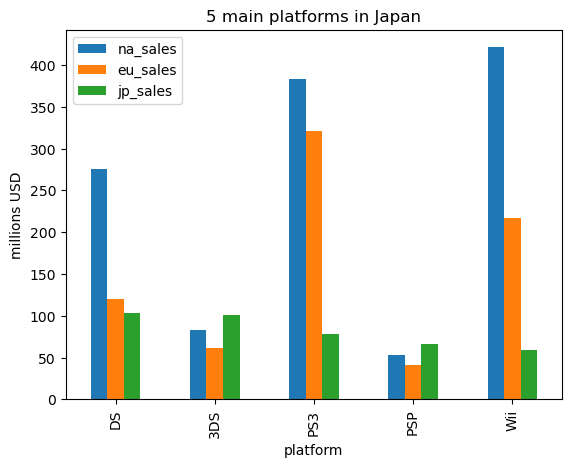

In [87]:
platform_region.sort_values(by='jp_sales',ascending=False).head().plot(kind='bar', ylabel='millions USD')
plt.title('5 main platforms in Japan')
plt.show()

Las plataformas con mayores ventas en Japón son DS, 3DS, PS3, PSP y Wii (de mayor a menor).

Similitudes y diferencias:

- En Norte América y Europa las 5 principales plataformas son las mismas X360, Wii, PS3, DS y PS4. 
- En Japón X360 y PS4 no están dentro de sus 5 principales plataformas, en su lugar DS y PSP. 
- En las 3 regiones NA, EU y JP coinciden Wii, PS3 y DS.

## Los 5 géneros en NA, EU y JP<a id='los'></a>

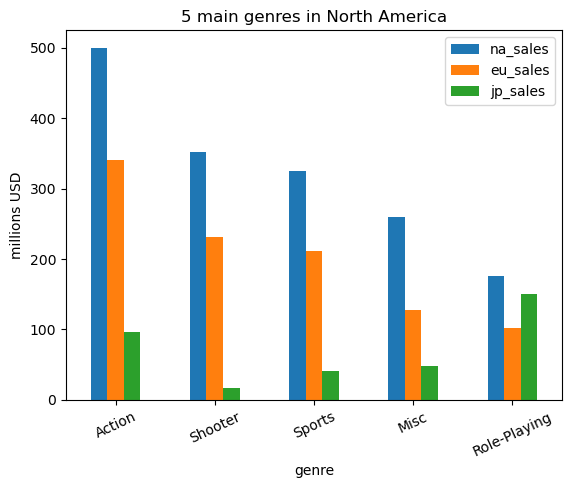

In [88]:
genre_region = clean_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

genre_region.sort_values(by='na_sales',ascending=False).head().plot(kind='bar', ylabel='millions USD', rot=25)
plt.title('5 main genres in North America')
plt.show()

Action, Shooter, Sports, Misc y Role-Playing son los 5 principales géneros de juegos de acuerdo a sus ventas en Norte América.

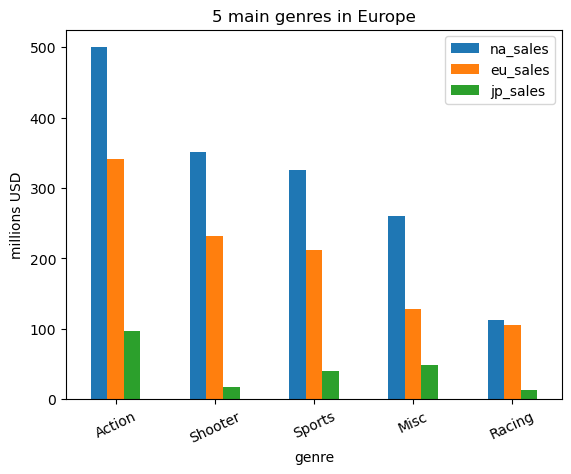

In [89]:
genre_region.sort_values(by='eu_sales',ascending=False).head().plot(kind='bar', ylabel='millions USD', rot=25)
plt.title('5 main genres in Europe')
plt.show()

Action, Shooter, Sports, Misc y Racing son los 5 principales géneros de juegos de acuerdo a sus ventas en Europa.

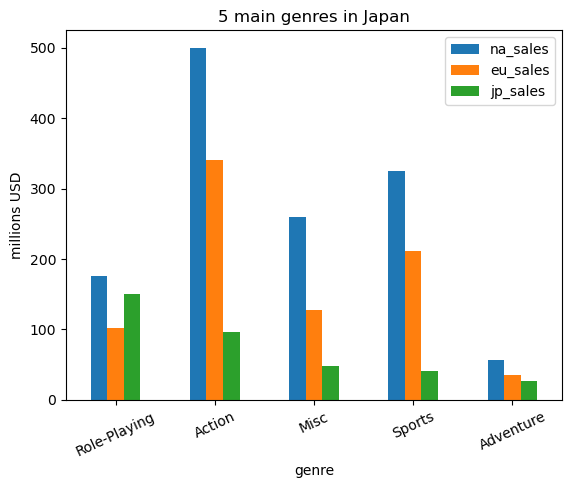

In [90]:
genre_region.sort_values(by='jp_sales',ascending=False).head().plot(kind='bar', ylabel='millions USD', rot=25)
plt.title('5 main genres in Japan')
plt.show()

Role-Playin, Action, Misc, Sports y Adventure son los 5 principales géneros de juegos de acuerdo a sus ventas en Japón.

Similitudes y diferencias:

- Action, Sports, Misc coinciden dentro de los 5 principales géneros en las 3 regiones a la vez.
- En NA y EU coinciden en 4 de 5 plataformas principales: Action, Shooter, Sports y Misc (de mayor a menor ventas).
- Adventure es el género que aparece en Japón como principal, pero no en NA ni EU. 
- En NA y EU Shooter es un género principal que no es en Japón.

## Clasificaciones de ESRB afectan a las ventas en regiones individuales<a id='cla'></a>

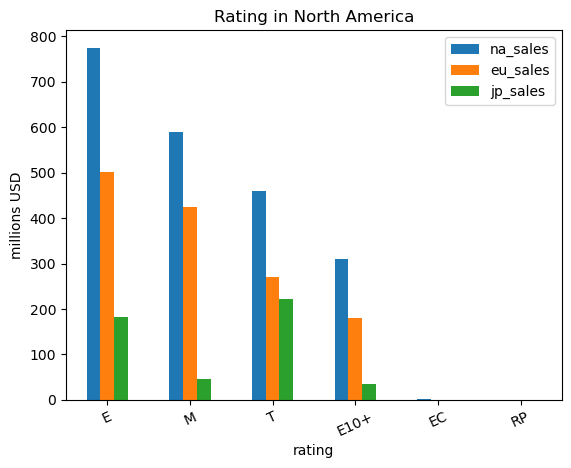

In [91]:
rating_region = clean_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

rating_region.sort_values(by='na_sales',ascending=False).plot(kind='bar', ylabel='millions USD', rot=25)
plt.title('Rating in North America')
plt.show()

En Norte América y Europa las ventas mayores están en la categoría E (todos). En Japón las ventas mayores son T (adolescentes).

En Norte América y Europa los juegos con categoria M (mayores de 17 años) es la segunda categoría de juego más vendida. Esto en Japón no ocurre, puesto que ocupa casi el último lugar en ventas.

# Prueba de hipótesis<a id='hip'></a>

Queremos saber si:
1. la calificación promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. la calificación promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Primero vamos a filtrar nuestro dataset creando variables donde estarán los datos sobre las puntuaciones de usuarios para las plataformas Xbox One y PC y para los géneros Action y Sports.

In [92]:
# Filtramos y guardamos en las variables xboxone, pc, action, sport que usaremos en las pruebas de hipótesis.

xboxone = clean_data.query('platform == "XOne" and not user_score.isna()')['user_score']
pc      = clean_data.query('platform == "PC" and not user_score.isna()')['user_score']

action = clean_data.query('genre == "Action" and not user_score.isna()')['user_score']
sports  = clean_data.query('genre == "Sports" and not user_score.isna()')['user_score']

## Prueba de hipótesis 1<a id='pr1'></a>

**Formulación de hipótesis nula (H0) y alternativa (Ha):**
 - H0: la calificación promedio de los usuarios para las plataformas Xbox One y PC son iguales.
 - H1: la calificación promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
 
Establecemos el nivel de significancia en 5% asumiendo un nivel de confianza del 95%.

In [93]:
print(f'The average user score for Xbox {xboxone.mean():.2f} and PC {pc.mean():.2f}')

The average user score for Xbox 6.51 and PC 6.77


In [94]:
alpha = 0.05
results = st.ttest_ind(xboxone, pc, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.030031155561078892
Rechazamos la hipótesis nula


Existe el 3% de probabilidad de que las calificaciones promedios de los usuarios sean iguales en la plataforma Xbox como en la plataforma PC, esta probabilidad es demaciado baja, por lo que decidimos rechazar nuestra hipótesis nula.

## Prueba de hipótesis 2<a id='pr2'></a>

**Formulación de hipótesis nula (H0) y alternativa (Ha):**

 - H0: la calificación promedio de los usuarios para los géneros de Acción y Deportes son iguales.
 - H1: la calificación promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [95]:
print(f'The average user score for genre Action {action.mean():.2f} and Sports {sports.mean():.2f}')

The average user score for genre Action 6.75 and Sports 6.24


In [96]:
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  9.478523258685512e-12
Rechazamos la hipótesis nula


Existe el 0.0000000009% de probabilidad de que las calificaciones promedios de los usuarios sean iguales en los juegos con género Acción y Deportes, esta probabilidad es casi nula, por lo que decidimos rotundamente rechazar nuestra hipótesis nula.

# Conclusión general<a id='con'></a>

Este trabajo buscó identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias futuras.

Empezamos preparando los datos realizando un importante tratamiento de valores ausente en varias columnas de nuestro dataset, a los cuales pudimos imputar parcialmente, tratando de no afectar los datos para no trastocar nuestro análisis posterior. Se crearon nuevas columnas una de ellas total_sales con la que manejamos las ventas totales de los juegos.

En la fase de análisis pudimos obtener los siguientes resultados:

* Las plataformas tienen un tiempo de vida de +-10 años, por lo que determinamos el periodo de estudio de este análisis desde el 2007 hasta el 2016 (los últimos 10 años).
* Las plataformas con más ventas son PS3 y X360, y potencialmente más rentables PS4 y Wii.
* Las reseñas de los críticos y la de los usuarios no se relacionan claramente con el éxito o fracaso de sus ventas.
* El juegos de género Action, Shooter y Sports tienen el mayor número de juegos así como también el mayor número en ventas.
* Los mejores perfiles de jugadores en Norte América, Europa y Japón son los siguientes:
  * Los usuarios de Norte América de los juegos de plataforma X360, de género Acción, de clasificación E (todas las edades)
  * Los usuarios de Europa de los juegos de plataforma PS3, de género Acción, de clasificación E (todas las edades)
  * Los usuarios de Japón de los juegos de plataforma DS, de género Role-Playing, de clasificación T (mayores de 17 años)

Realizamos 2 pruebas de hipótesis y obtuvimos las siguientes conclusiones:
- El promedio de la calificación de los usuarios para los juegos de plataforma Xbox y PC no son iguales.
- El promedio de la calificación de los usuarios para los juegos de géneros de Acción y Deportes no son iguales.
